# Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import KNNImputer

## Store Dataset Processing

In [ ]:
store = pd.read_csv('store.csv')

In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# review cat feature values
cat_vars = store[['Store', 'StoreType', 'Assortment', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceYear', 'PromoInterval']]
for i in cat_vars.columns:
    print(f'Column {i} has the following value types:')
    print(cat_vars[i].unique())
    print(f'in total {cat_vars[i].nunique()} unique values\n')

Column Store has the following value types:
[   1    2    3 ... 1113 1114 1115]
in total 1115 unique values

Column StoreType has the following value types:
['c' 'a' 'd' 'b']
in total 4 unique values

Column Assortment has the following value types:
['a' 'c' 'b']
in total 3 unique values

Column CompetitionOpenSinceYear has the following value types:
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
in total 23 unique values

Column Promo2 has the following value types:
[0 1]
in total 2 unique values

Column Promo2SinceYear has the following value types:
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
in total 7 unique values

Column PromoInterval has the following value types:
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
in total 3 unique values



In [ ]:
# count missing values
for col in store.columns:
    print(f'Column {col} has {store[col].isna().sum()} missing values\n')

Column Store has 0 missing values

Column StoreType has 0 missing values

Column Assortment has 0 missing values

Column CompetitionDistance has 3 missing values

Column CompetitionOpenSinceMonth has 354 missing values

Column CompetitionOpenSinceYear has 354 missing values

Column Promo2 has 0 missing values

Column Promo2SinceWeek has 544 missing values

Column Promo2SinceYear has 544 missing values

Column PromoInterval has 544 missing values



In [ ]:
# explore missing values
week_missing = pd.crosstab(store['Promo2SinceWeek'], store['Promo2'])
print(week_missing)
year_missing = pd.crosstab(store['Promo2SinceYear'], store['Promo2'])
print(year_missing)
interval_missing = pd.crosstab(store['PromoInterval'], store['Promo2'])
print(interval_missing)


Promo2            1
Promo2SinceWeek    
1.0              35
5.0              39
6.0               1
9.0              14
10.0             42
13.0             34
14.0             81
18.0             29
22.0             33
23.0              5
26.0              1
27.0             11
28.0              1
31.0             44
35.0             25
36.0             10
37.0             35
39.0              6
40.0             77
44.0              3
45.0             34
48.0              9
49.0              1
50.0              1
Promo2             1
Promo2SinceYear     
2009.0            73
2010.0            64
2011.0           128
2012.0            81
2013.0           120
2014.0            95
2015.0            10
Promo2              1
PromoInterval        
Feb,May,Aug,Nov   130
Jan,Apr,Jul,Oct   335
Mar,Jun,Sept,Dec  106


In [ ]:
store[store['Promo2']==0].head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
22,23,d,a,4060.0,8.0,2005.0,0,NaN,NaN,NaN


### Observations

- No promotion means missing data for columns: Promo2SinceWeek, Promo2SinceYear, PromoInterval
- Features: CompetitionOpenSinceMonth &	CompetitionOpenSinceYear, Promo2 & Promo2SinceWeek & Promo2SinceYear & PromoInterval, are all going to correlate with each other. Consider removing some of the columns after EDA.
- Should we drop Promo2 since Train dataset also contains Promo?
- The interval of train dataset is three years (2013,2014,2015). The interval of test dataset is period in 2015: The first date of test dataset: 2015-08-01 00:00:00.
 The last date of test dataset: 2015-09-17 00:00:00
- Thus, the train dataset needs to be limited only to a period of test dataset since promo is seasonal and sales too.
- Sales are highly seasonal and depend on the day as seen in the graph. Train dataset should only include period from test dataset everything else should be dropped.
- Store can be joined to train dataset with fewer rows (right join). This way we add even more features to stores.
- There is missing data only from store 622 on Test dataset (on feature 'Open'). Since we don't know whether the store was closed or open we should drop it from test dataset. .dropna('Open', axis = 1)
- There is another way of dealing with missing data. We can take the mean from 2013 and 2014 and replace the missing variables in Test.Dataset
- Keep the data from Open for store 622 (.fillna(0))
- Competition new column: 1,0
- Drop Promo2sinceweek and PromoYear and use promo2 instead
- TBD following EDA: PromoInterval (check whether ir affects the sales)
- Column StateHoliday ['0' 'a' 'b' 'c' 0]: 0,1
- Test dataset only has 856 stores. Restrict train data to test timeline interval and test stores.
- 856 VS 1114 Stores in train test. Should we train on every store or should we restrict our model to only test dataset
- Check the correlation btwn sales and stores: on assortment and store type


## Train Dataset Processing

In [ ]:
train = pd.read_csv('train.csv')

<ipython-input-9-f1a1f2ce149f>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


In [ ]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# review cat feature values
cat_vars = train[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
for i in cat_vars.columns:
    print(f'Column {i} has the following value types:')
    print(cat_vars[i].unique())
    print(f'in total {cat_vars[i].nunique()} unique values\n')

Column Store has the following value types:
[   1    2    3 ... 1113 1114 1115]
in total 1115 unique values

Column DayOfWeek has the following value types:
[5 4 3 2 1 7 6]
in total 7 unique values

Column Open has the following value types:
[1 0]
in total 2 unique values

Column Promo has the following value types:
[1 0]
in total 2 unique values

Column StateHoliday has the following value types:
['0' 'a' 'b' 'c' 0]
in total 5 unique values

Column SchoolHoliday has the following value types:
[1 0]
in total 2 unique values



### Preprocessing observations

- Change to pd.Datetime type
- Sundays are closed
-

In [ ]:
train[(train['DayOfWeek']==7) & (train['Open']==1)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5659,85,7,26/07/2015,11421,1606,1,0,0,0
5696,122,7,26/07/2015,5773,707,1,0,0,0
5783,209,7,26/07/2015,3742,354,1,0,0,0
5833,259,7,26/07/2015,15998,2857,1,0,0,0
5836,262,7,26/07/2015,32547,4783,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1011252,733,7,06/01/2013,11226,2584,1,0,0,0
1011288,769,7,06/01/2013,6995,1764,1,0,0,0
1011382,863,7,06/01/2013,2067,255,1,0,0,0
1011467,948,7,06/01/2013,6024,1402,1,0,a,0


In [ ]:
# Convert into datetime
train['Date'] = pd.to_datetime(train['Date'], dayfirst=True)


In [ ]:
# Create a new variable called year from date
train['year'] = train['Date'].dt.year


In [ ]:
train['year'].value_counts()

,count
year,
2013,406974
2014,373855
2015,236380


In [ ]:
print(train['Date'].max())

2015-07-31 00:00:00


In [ ]:
train = train.sort_index()

In [ ]:
# Interval of test dataset

print(f'The first date of train dataset: {train["Date"].min()}.\n The last date of train dataset: {train["Date"].max()} ')

The first date of train dataset: 2013-01-01 00:00:00.
 The last date of train dataset: 2015-07-31 00:00:00 


Store      1
count    758
dtype: int64
Store    1115
count     942
dtype: int64


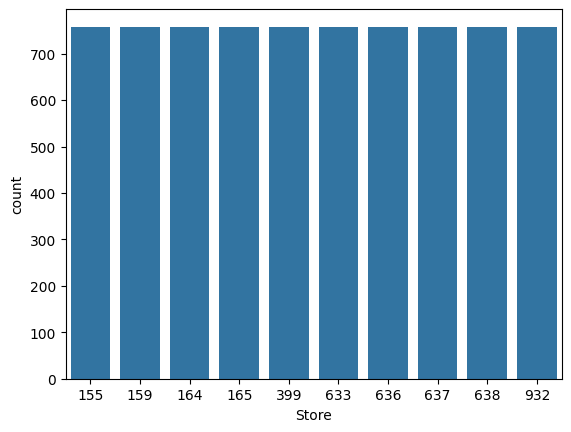

In [ ]:
# Group by 'Store' and count the number of entries for each store
stores_group = train.groupby('Store').size().reset_index(name='count')
stores_group_sorted = stores_group.sort_values(by='count', ascending=False)

sns.barplot(data=stores_group_sorted.tail(10), x='Store', y='count')

print(stores_group_sorted.min())
print(stores_group_sorted.max())

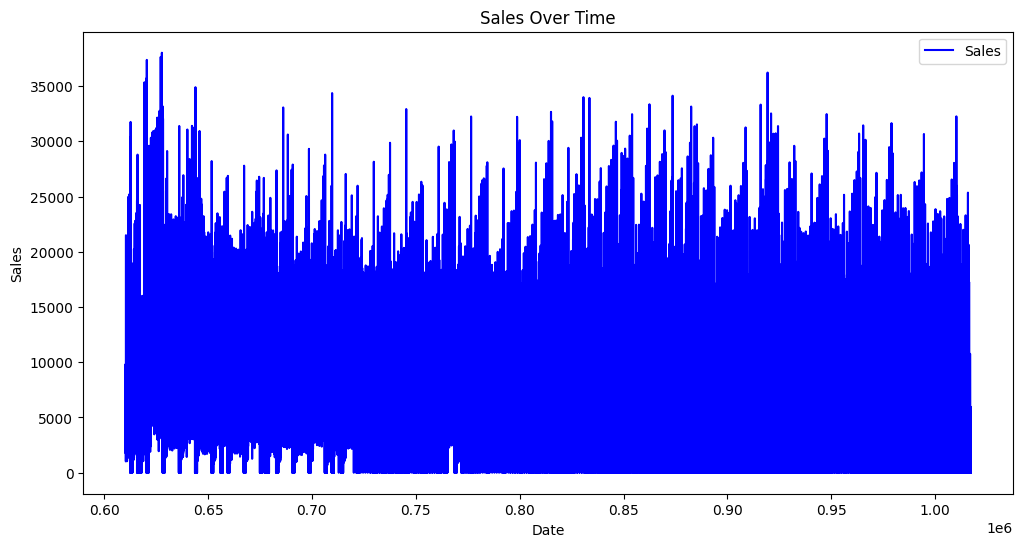

In [ ]:
# Restrict to year 2013
sales_2013 = train[train['year']==2013]

# Plot the sales data
plt.figure(figsize=(12, 6))
plt.plot(sales_2013.index, sales_2013['Sales'], label='Sales', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(False)
plt.legend()
plt.show()

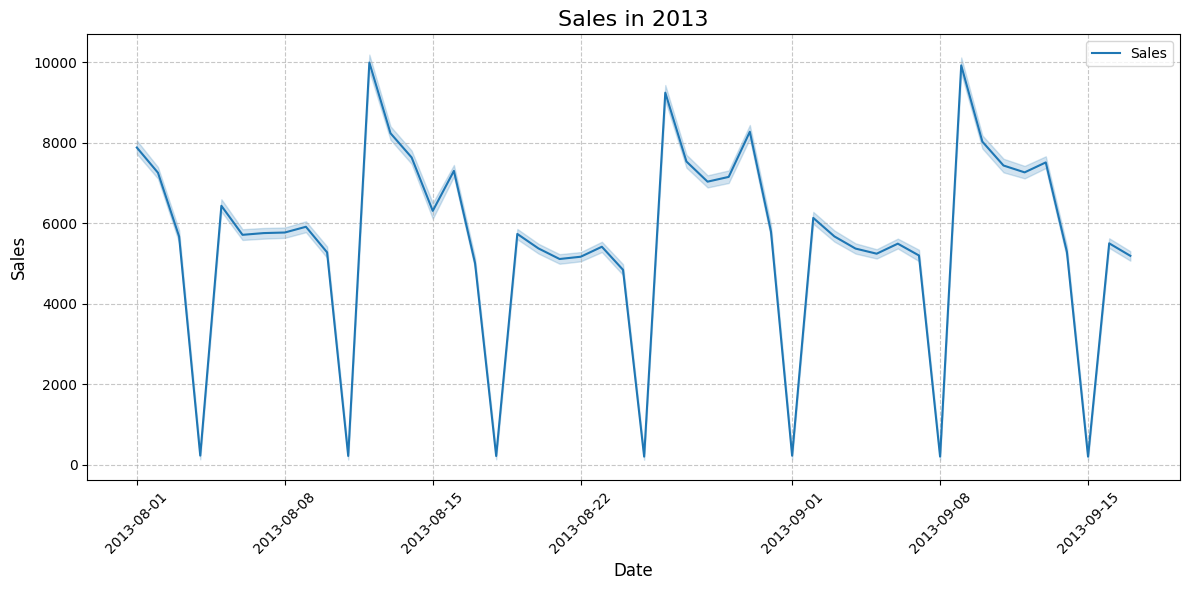

In [ ]:
# Subset to the period of test dataset
subset = train[(train['Date'] >= '2013-08-01') & (train['Date'] <= '2013-09-17')]

# Reset the index to make 'Date' a regular column for plotting
subset = subset.reset_index()

# Create the Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset, x='Date', y='Sales', label='Sales')

# Add a title and labels
plt.title('Sales in 2013', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

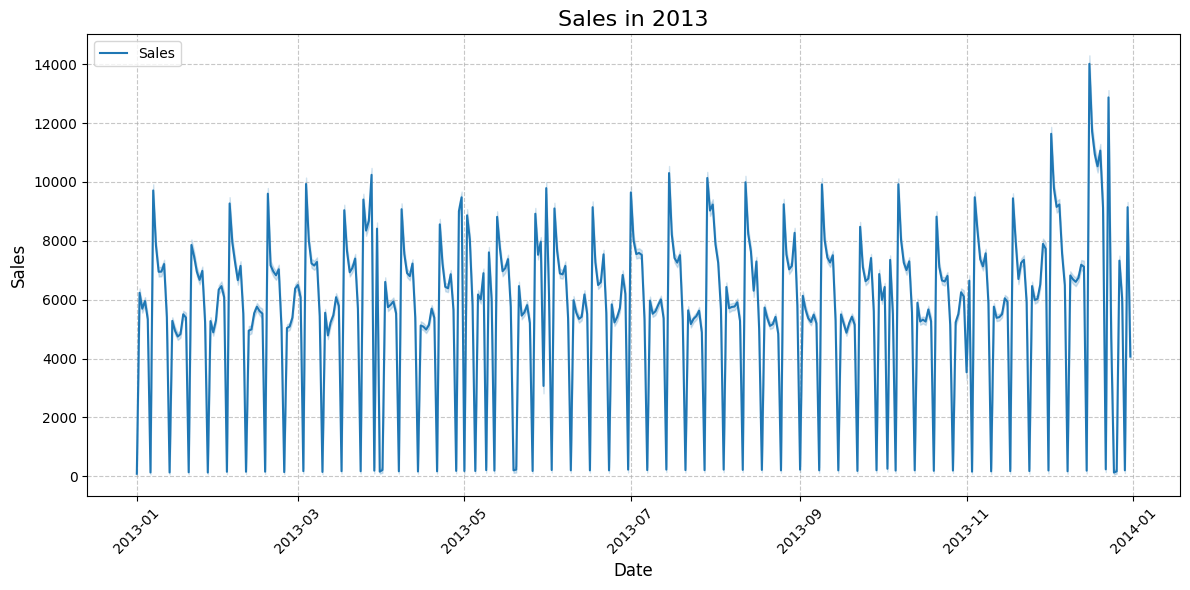

In [ ]:
# Subset to the period of test dataset
subset2013 = train[(train['Date'] >= '2013-01-01') & (train['Date'] <= '2013-12-31')]

# Reset the index to make 'Date' a regular column for plotting
subset2013 = subset2013.reset_index()

# Create the Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset2013, x='Date', y='Sales', label='Sales')

# Add a title and labels
plt.title('Sales in 2013', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

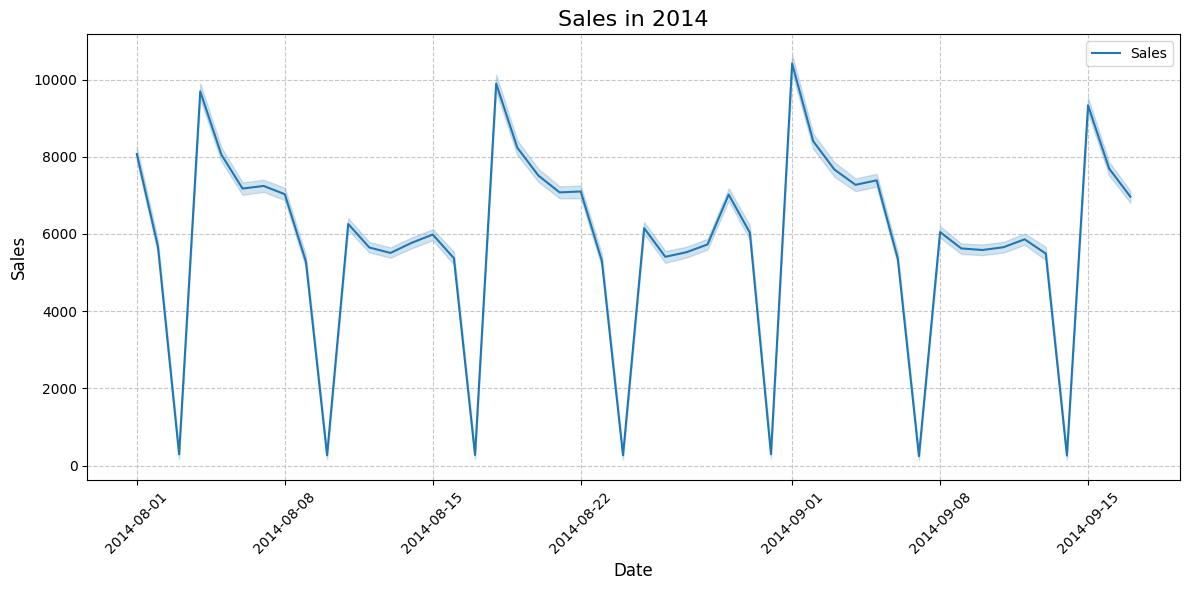

In [ ]:
# Subset to the period of test dataset 2014
subset2 = train[(train['Date'] >= '2014-08-01') & (train['Date'] <= '2014-09-17')]

# Reset the index to make 'Date' a regular column for plotting
subset2 = subset2.reset_index()

# Create the Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset2, x='Date', y='Sales', label='Sales')

# Add a title and labels
plt.title('Sales in 2014', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

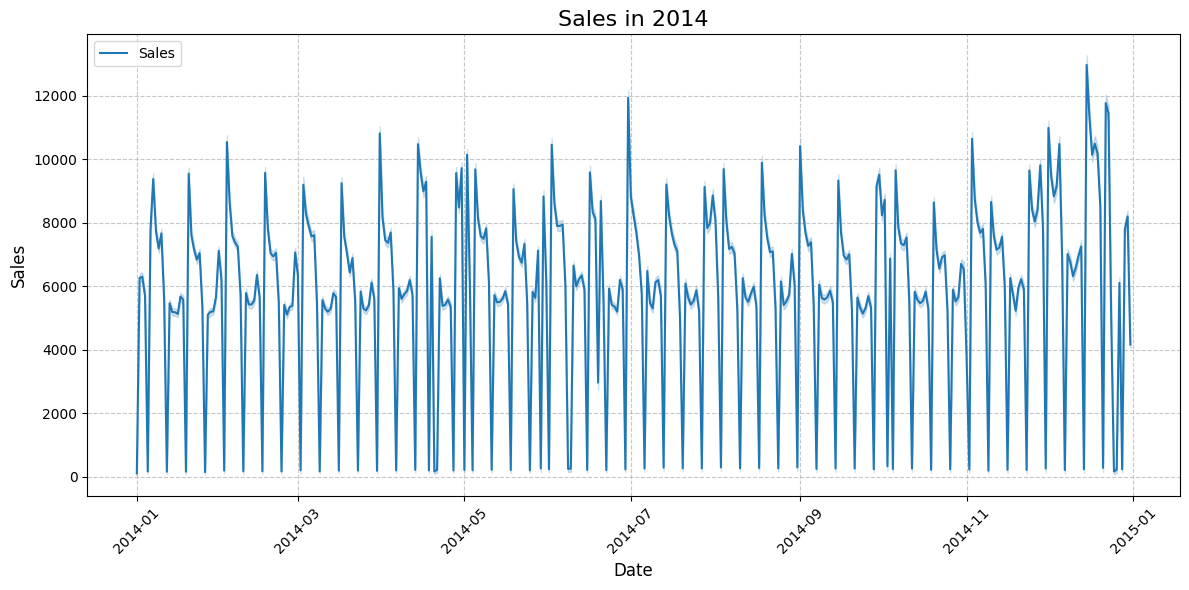

In [ ]:
# Subset to the period of test dataset
subset2014 = train[(train['Date'] >= '2014-01-01') & (train['Date'] <= '2014-12-31')]

# Reset the index to make 'Date' a regular column for plotting
subset2014 = subset2014.reset_index()

# Create the Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=subset2014, x='Date', y='Sales', label='Sales')

# Add a title and labels
plt.title('Sales in 2014', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Test Dataset Processing

In [ ]:
test = pd.read_csv('test.csv')
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [ ]:
test['Date'] = pd.to_datetime(test['Date'], dayfirst=True)


In [ ]:
# Create a new variable called year from date
test['year'] = test['Date'].dt.year
test['year'].value_counts()

,count
year,
2015,41088


In [ ]:
# Interval of test dataset

print(f'The first date of test dataset: {test["Date"].min()}.\n The last date of test dataset: {test["Date"].max()} ')

The first date of test dataset: 2015-08-01 00:00:00.
 The last date of test dataset: 2015-09-17 00:00:00 


In [ ]:
test['Open'].value_counts(normalize=True)
mask = test['Open'].isna()
test[mask]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year
479,622,4,2015-09-17,NaN,NaN,NaN,1,0,0,2015
1335,622,3,2015-09-16,NaN,NaN,NaN,1,0,0,2015
2191,622,2,2015-09-15,NaN,NaN,NaN,1,0,0,2015
3047,622,1,2015-09-14,NaN,NaN,NaN,1,0,0,2015
4759,622,6,2015-09-12,NaN,NaN,NaN,0,0,0,2015
5615,622,5,2015-09-11,NaN,NaN,NaN,0,0,0,2015
6471,622,4,2015-09-10,NaN,NaN,NaN,0,0,0,2015
7327,622,3,2015-09-09,NaN,NaN,NaN,0,0,0,2015
8183,622,2,2015-09-08,NaN,NaN,NaN,0,0,0,2015
9039,622,1,2015-09-07,NaN,NaN,NaN,0,0,0,2015


In [ ]:
test[test['Store']==622]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year
479,622,4,2015-09-17,NaN,NaN,NaN,1,0,0,2015
1335,622,3,2015-09-16,NaN,NaN,NaN,1,0,0,2015
2191,622,2,2015-09-15,NaN,NaN,NaN,1,0,0,2015
3047,622,1,2015-09-14,NaN,NaN,NaN,1,0,0,2015
3903,622,7,2015-09-13,NaN,NaN,0.0,0,0,0,2015
4759,622,6,2015-09-12,NaN,NaN,NaN,0,0,0,2015
5615,622,5,2015-09-11,NaN,NaN,NaN,0,0,0,2015
6471,622,4,2015-09-10,NaN,NaN,NaN,0,0,0,2015
7327,622,3,2015-09-09,NaN,NaN,NaN,0,0,0,2015
8183,622,2,2015-09-08,NaN,NaN,NaN,0,0,0,2015


##Preprocessing After Merging Datasets

In [ ]:
# Merge store data with train and test dataset
train = train.merge(store, on="Store", how="left")
test = test.merge(store, on="Store", how="left")

In [ ]:
# Initialize 'Competition' column to 0
train['Competition'] = 0
test['Competition'] = 0

In [ ]:
# Update 'Competition' to 1 where competition is active (month and year provided)
def update_competition_status(row):
    if not pd.isna(row['CompetitionOpenSinceMonth']) and not pd.isna(row['CompetitionOpenSinceYear']):
        competition_start_date = pd.Timestamp(year=int(row['CompetitionOpenSinceYear']),
                                              month=int(row['CompetitionOpenSinceMonth']), day=1)
        if row['Date'] >= competition_start_date:
            return 1
    return 0

In [ ]:
# Update 'Promo2' column based on Promo2SinceWeek and Promo2SinceYear
def update_promo2(row):
    if not pd.isna(row['Promo2SinceYear']) and not pd.isna(row['Promo2SinceWeek']):
        # Calculate the start date using the year and week number
        promo_start_date = pd.to_datetime(str(int(row['Promo2SinceYear'])) + '-W' + str(int(row['Promo2SinceWeek'])) + '-1', format='%Y-W%W-%w')
        if row['Date'] >= promo_start_date:
            return 1
    return 0

In [ ]:
train['Competition'] = train.apply(update_competition_status, axis=1)
test['Competition'] = test.apply(update_competition_status, axis=1)

In [ ]:
train['Promo2'] = train.apply(update_promo2, axis=1)
test['Promo2'] = test.apply(update_promo2, axis=1)

In [ ]:
# Drop old columns related to competition and promo2 dates
train = train.drop(columns=["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear",
                                                       "Promo2SinceWeek", "Promo2SinceYear"])
test = test.drop(columns=["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear",
                                                       "Promo2SinceWeek", "Promo2SinceYear"])

In [ ]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,c,a,1270.0,0,NaN,1
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,a,a,570.0,1,"Jan,Apr,Jul,Oct",1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,a,a,14130.0,1,"Jan,Apr,Jul,Oct",1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,c,c,620.0,0,NaN,1
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,a,a,29910.0,0,NaN,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   year                 1017209 non-null  int32         
 10  StoreType            1017209 non-null  object        
 11  Assortment           1017209 non-null  object        
 12  CompetitionDistance  1014567 non-null  float64       
 1

In [ ]:
def convert_stateholiday_to_binary(value):
    # Treat both integer 0 and string "0" as 0
    if value == 0 or value == "0":
        return 0
    # All other values become 1
    return 1

In [ ]:
# Apply the function to the StateHoliday column
train['StateHoliday'] = train['StateHoliday'].apply(convert_stateholiday_to_binary)
test['StateHoliday'] = test['StateHoliday'].apply(convert_stateholiday_to_binary)

In [ ]:
# Check the unique values in the column to verify
print(train['SchoolHoliday'].unique())

[1 0]


In [ ]:
# Replace NaN in 'Open' with 0
test['Open'] = test['Open'].fillna(0)

In [ ]:
# Verify if there are still NaN values
print(test['Open'].isna().sum())  # Should print 0

0


##EDA

<ipython-input-47-87e8cecad8da>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_store_type.index, y=sales_by_store_type.values, palette="viridis")


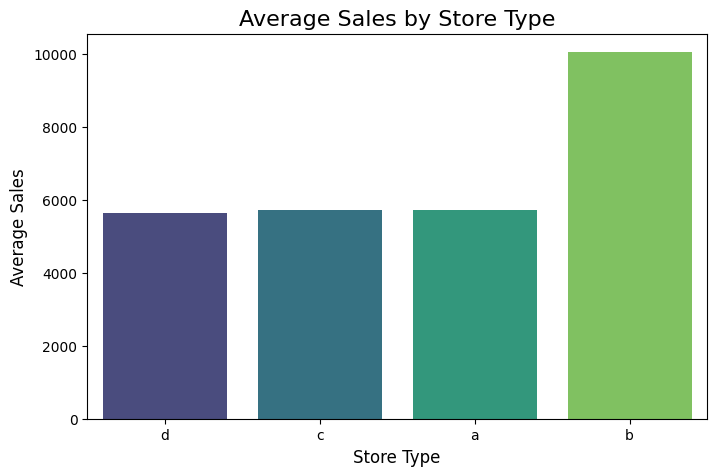

,Sales
StoreType,
d,5641.819243
c,5723.629246
a,5738.179710
b,10058.837334


In [ ]:
# Group by StoreType and calculate average sales
sales_by_store_type = train.groupby('StoreType')['Sales'].mean().sort_values()

# Plot average sales by store type
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_store_type.index, y=sales_by_store_type.values, palette="viridis")
plt.title('Average Sales by Store Type', fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

sales_by_store_type


<ipython-input-48-f5d58f37043f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_assortment.index, y=sales_by_assortment.values, palette="coolwarm")


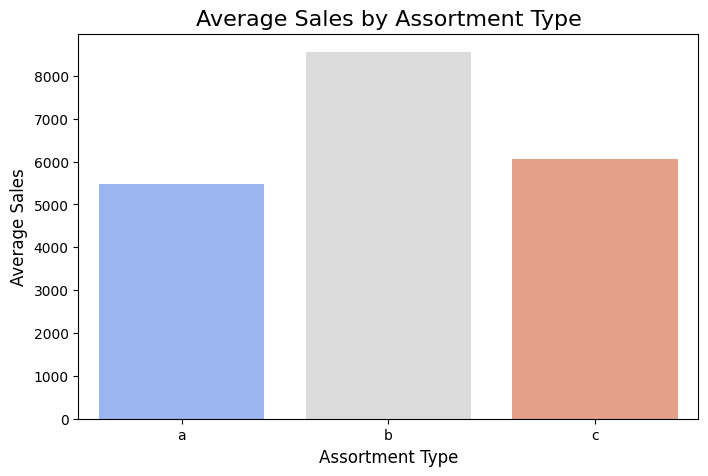

In [ ]:
# Group by Assortment
sales_by_assortment = train.groupby('Assortment')['Sales'].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_assortment.index, y=sales_by_assortment.values, palette="coolwarm")
plt.title('Average Sales by Assortment Type', fontsize=16)
plt.xlabel('Assortment Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

<ipython-input-49-340dde114eb3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales.values, palette="magma")


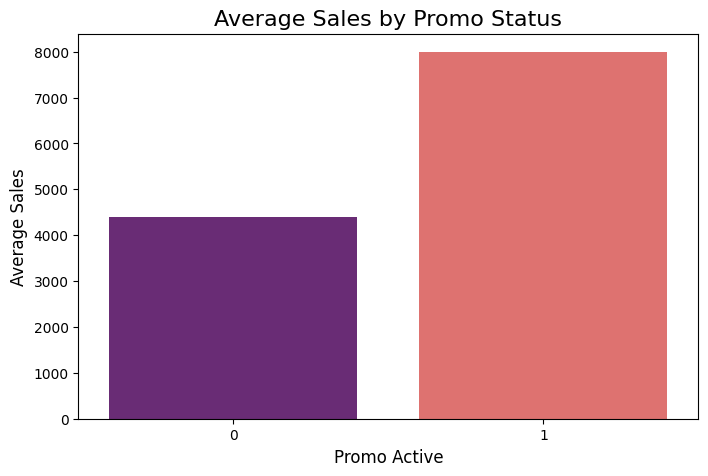

In [ ]:
# Group by Promo and Promo2
promo_sales = train.groupby('Promo')['Sales'].mean()


# Plot Promo
plt.figure(figsize=(8, 5))
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette="magma")
plt.title('Average Sales by Promo Status', fontsize=16)
plt.xlabel('Promo Active', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

<ipython-input-50-41284b16c4ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo2_sales.index, y=promo2_sales.values, palette="cool")


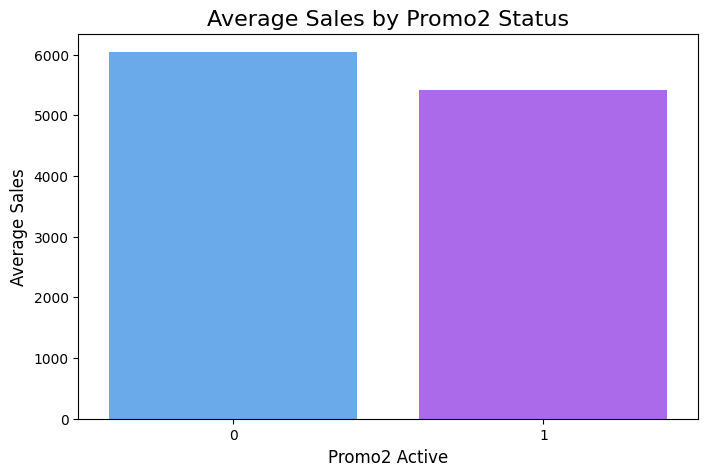

In [ ]:
# Group by Promo and Promo2
promo2_sales = train.groupby('Promo2')['Sales'].mean()

# Plot Promo2
plt.figure(figsize=(8, 5))
sns.barplot(x=promo2_sales.index, y=promo2_sales.values, palette="cool")
plt.title('Average Sales by Promo2 Status', fontsize=16)
plt.xlabel('Promo2 Active', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

<ipython-input-51-5dd4f27fa61a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_interval_sales_filtered.index, y=promo_interval_sales_filtered.values, palette="Set2")


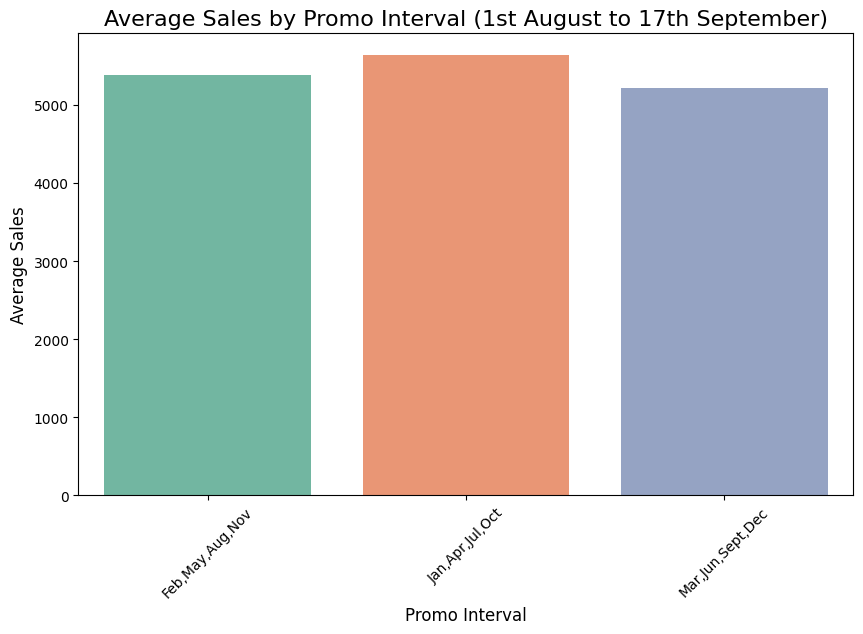

In [ ]:
# Filter the data between 2015-08-01 and 2015-09-17
filtered_data = train[(train['Date'] >= '2014-08-01') & (train['Date'] <= '2015-09-17')|(train['Date'] >= '2013-08-01') & (train['Date'] <= '2014-09-17')]

# Group by PromoInterval and calculate average sales for the filtered data
promo_interval_sales_filtered = filtered_data.groupby('PromoInterval')['Sales'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=promo_interval_sales_filtered.index, y=promo_interval_sales_filtered.values, palette="Set2")
plt.title('Average Sales by Promo Interval (1st August to 17th September)', fontsize=16)
plt.xlabel('Promo Interval', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-52-efec25997778>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=competition_sales.index, y=competition_sales.values, palette="crest")


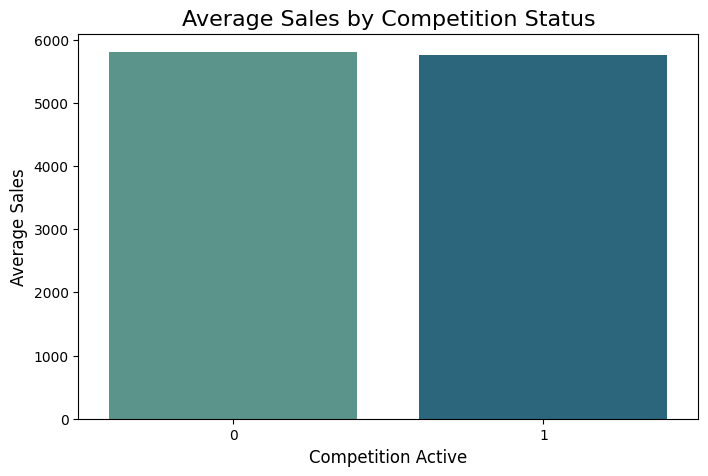

In [ ]:
# Group by Competition
competition_sales = train.groupby('Competition')['Sales'].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=competition_sales.index, y=competition_sales.values, palette="crest")
plt.title('Average Sales by Competition Status', fontsize=16)
plt.xlabel('Competition Active', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

<ipython-input-53-66972a649eaf>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_sales = train.groupby('CompDistanceBins')['Sales'].mean()
<ipython-input-53-66972a649eaf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_sales.index, y=distance_sales.values, palette="cubehelix")


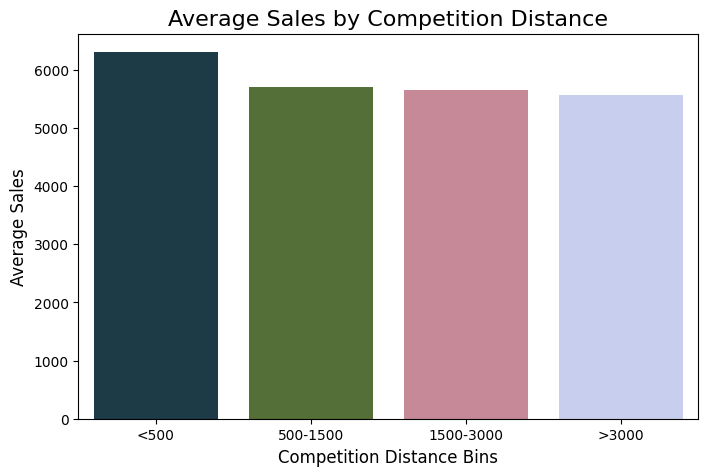

In [ ]:
# Create bins for CompetitionDistance
train['CompDistanceBins'] = pd.cut(train['CompetitionDistance'], bins=[0, 500, 1500, 3000, 10000], labels=['<500', '500-1500', '1500-3000', '>3000'])

# Group by bins
distance_sales = train.groupby('CompDistanceBins')['Sales'].mean()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=distance_sales.index, y=distance_sales.values, palette="cubehelix")
plt.title('Average Sales by Competition Distance', fontsize=16)
plt.xlabel('Competition Distance Bins', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
store_type_encoder = LabelEncoder()
assortment_encoder = LabelEncoder()

In [ ]:
# prompt: train data between 1/08/2013 and 17/09/2103 and between 1/08/2014 and 17/09/2014

# Filter the training data for the specified periods
train = train[((train['Date'] >= '2013-08-01') & (train['Date'] <= '2013-09-17')) |
                     ((train['Date'] >= '2014-08-01') & (train['Date'] <= '2014-09-17'))]

In [ ]:
# Encode 'StoreType' and 'Assortment'
train['StoreTypeEncoded'] = store_type_encoder.fit_transform(train['StoreType'])
train['AssortmentEncoded'] = assortment_encoder.fit_transform(train['Assortment'])
test['StoreTypeEncoded'] = store_type_encoder.transform(test['StoreType'])
test['AssortmentEncoded'] = assortment_encoder.transform(test['Assortment'])
# Check unique mappings (optional)
print("StoreType Mapping:", dict(zip(store_type_encoder.classes_, range(len(store_type_encoder.classes_)))))
print("Assortment Mapping:", dict(zip(assortment_encoder.classes_, range(len(assortment_encoder.classes_)))))


StoreType Mapping: {'a': 0, 'b': 1, 'c': 2, 'd': 3}
Assortment Mapping: {'a': 0, 'b': 1, 'c': 2}


<ipython-input-56-486c9952dcc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['StoreTypeEncoded'] = store_type_encoder.fit_transform(train['StoreType'])
<ipython-input-56-486c9952dcc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AssortmentEncoded'] = assortment_encoder.fit_transform(train['Assortment'])


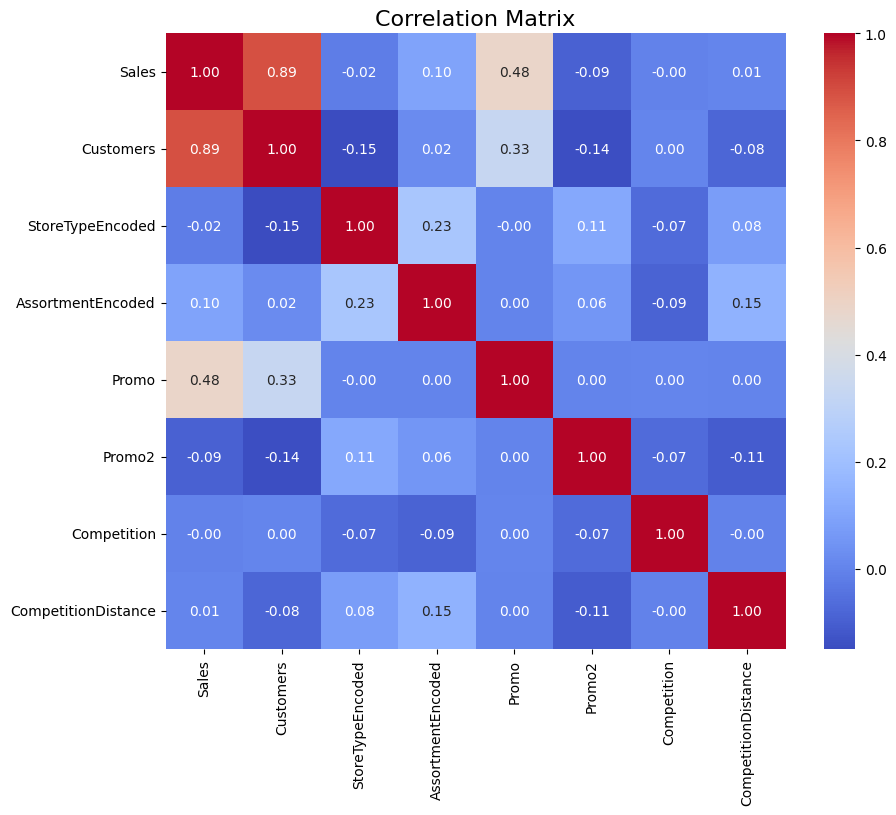

In [ ]:
# Correlation matrix
correlation_matrix = train[['Sales', 'Customers', 'StoreTypeEncoded', 'AssortmentEncoded', 'Promo', 'Promo2', 'Competition', 'CompetitionDistance' ]].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [ ]:
# Create 'is_sunday' column
train['is_sunday'] = train['DayOfWeek'] == 7

# Separate into Sundays and non-Sundays
sundays_data = train[train['is_sunday']]
non_sundays_data = train[~train['is_sunday']]

In [ ]:
# Filter the stores where Open = 1 and DayOfWeek = 7
open_stores_day_7 = sundays_data[sundays_data['Open'] == 1]

# Return the unique stores
unique_open_stores_day_7 = open_stores_day_7['Store'].unique()

# Display the result
print(unique_open_stores_day_7)

[  85  122  209  259  262  274  299  310  335  353  423  433  453  494
  524  530  562  578  676  682  732  733  769  863  867  931  948 1045
 1081 1097 1099  512  877]


In [ ]:
# Separate the train data based on whether stores are open or closed
open_stores = train[train['Open'] == 1]
closed_stores = train[train['Open'] == 0]

# Now you have two separate DataFrames:
# - open_stores: Contains data for stores that were open.
# - closed_stores: Contains data for stores that were closed.

# Example usage:
print("Number of open stores:", len(open_stores['Store'].unique()))
print("Number of closed stores:", len(closed_stores['Store'].unique()))

Number of open stores: 1115
Number of closed stores: 1083


In [ ]:
# Separate the test data based on whether stores are open or closed
open_stores_test = test[test['Open'] == 1]
closed_stores_test = test[test['Open'] == 0]

# Now you have two separate DataFrames:
# - open_stores: Contains data for stores that were open.
# - closed_stores: Contains data for stores that were closed.

# Example usage:
print("Number of open stores:", len(open_stores_test['Store'].unique()))
print("Number of closed stores:", len(closed_stores_test['Store'].unique()))

Number of open stores: 856
Number of closed stores: 831


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = open_stores[['DayOfWeek', 'Promo', 'StoreTypeEncoded', 'AssortmentEncoded']]
y_sales = open_stores['Sales']  # Target variable: Sales
y_customers = open_stores['Customers']  # Target variable: Customers

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y_sales, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_valid.shape)

Training set size: (67271, 4)
Validation set size: (16818, 4)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_valid)

# Evaluate the model
mse_rf = mean_squared_error(y_valid, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 2505.165924108979


In [ ]:
import lightgbm as lgb

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_lgb = lgb_model.predict(X_valid)

# Evaluate the model
mse_lgb = mean_squared_error(y_valid, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
print("LightGBM RMSE:", rmse_lgb)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 67271, number of used features: 4
[LightGBM] [Info] Start training from score 6663.174800
LightGBM RMSE: 2505.6203549924717


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import root_mean_squared_error
# Neural Network
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

y_pred_nn = nn_model.predict(X_valid).flatten()

# Evaluate the model
rmse_nn = root_mean_squared_error(y_valid, y_pred_nn)
print("Neural Network RMSE:", rmse_nn)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 14565896.0000
Epoch 2/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - loss: 7902563.5000
Epoch 3/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 7861902.0000
Epoch 4/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 7889774.5000
Epoch 5/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 7887571.5000
Epoch 6/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 7894989.5000
Epoch 7/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 7896743.0000
Epoch 8/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 7849146.0000
Epoch 9/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 7842262.0000
Epoch 10/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - loss: 7847617.0000
Epoch 11/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 7842155.5000
Epoch 12/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - loss: 7878391.0000
Epoch 13/50
21110/21110 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - 

In [ ]:
np.mean(open_stores['Sales'])

6664.18826481466

In [ ]:
rmse_rf/np.mean(open_stores['Sales'])

0.37591463874687686

In [ ]:
# Prepare the test data for prediction
X_test = open_stores_test[['DayOfWeek', 'Promo', 'StoreTypeEncoded', 'AssortmentEncoded']]

# Use the trained Random Forest model to predict sales on the test data
y_pred_test = rf_model.predict(X_test)

# Print or further process the predictions
y_pred_test

array([7121.7899867 , 6949.59081966, 8280.21093262, ..., 5877.93161539,
       5877.93161539, 6073.56955946])

In [ ]:
open_stores_test['Sales'] = y_pred_test

<ipython-input-69-4dc807fe9475>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_stores_test['Sales'] = y_pred_test


In [ ]:
closed_stores_test['Sales'] = 0

<ipython-input-70-51336b82b267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_stores_test['Sales'] = 0


In [ ]:
open_stores_test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition,StoreTypeEncoded,AssortmentEncoded
0,1,4,2015-09-17,7121.789987,NaN,1.0,1,0,0,2015,c,a,1270.0,0,NaN,1,2,0
1,3,4,2015-09-17,6949.590820,NaN,1.0,1,0,0,2015,a,a,14130.0,1,"Jan,Apr,Jul,Oct",1,0,0
2,7,4,2015-09-17,8280.210933,NaN,1.0,1,0,0,2015,a,c,24000.0,0,NaN,1,0,2
3,8,4,2015-09-17,6949.590820,NaN,1.0,1,0,0,2015,a,a,7520.0,0,NaN,1,0,0
4,9,4,2015-09-17,8280.210933,NaN,1.0,1,0,0,2015,a,c,2030.0,0,NaN,1,0,2


In [ ]:
test_final = pd.concat([open_stores_test, closed_stores_test])

In [ ]:
test_final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Competition,StoreTypeEncoded,AssortmentEncoded
0,1,4,2015-09-17,7121.789987,NaN,1.0,1,0,0,2015,c,a,1270.0,0,NaN,1,2,0
1,3,4,2015-09-17,6949.590820,NaN,1.0,1,0,0,2015,a,a,14130.0,1,"Jan,Apr,Jul,Oct",1,0,0
2,7,4,2015-09-17,8280.210933,NaN,1.0,1,0,0,2015,a,c,24000.0,0,NaN,1,0,2
3,8,4,2015-09-17,6949.590820,NaN,1.0,1,0,0,2015,a,a,7520.0,0,NaN,1,0,0
4,9,4,2015-09-17,8280.210933,NaN,1.0,1,0,0,2015,a,c,2030.0,0,NaN,1,0,2


In [ ]:
# Sort the DataFrame first by 'Date' and then by 'Store'
test_final = test_final.sort_values(by=['Date', 'Store'])

In [ ]:
# Select only the 'Store', 'Date', and 'Sales' columns
test_final_selected = test_final[['Store', 'Date', 'Sales']]

# Convert the selected columns to a CSV file
test_final_selected.to_csv('test_final_selected.csv', index=False)

In [ ]:
# Calculate the proportion of open and closed stores
total_stores = len(train['Store'])
open_stores_proportion = len(open_stores['Store']) / total_stores
closed_stores_proportion = len(closed_stores['Store']) / total_stores

print(f"Proportion of open stores: {open_stores_proportion}")
print(f"Proportion of closed stores: {closed_stores_proportion}")

Proportion of open stores: 0.8545630081300813
Proportion of closed stores: 0.1454369918699187
